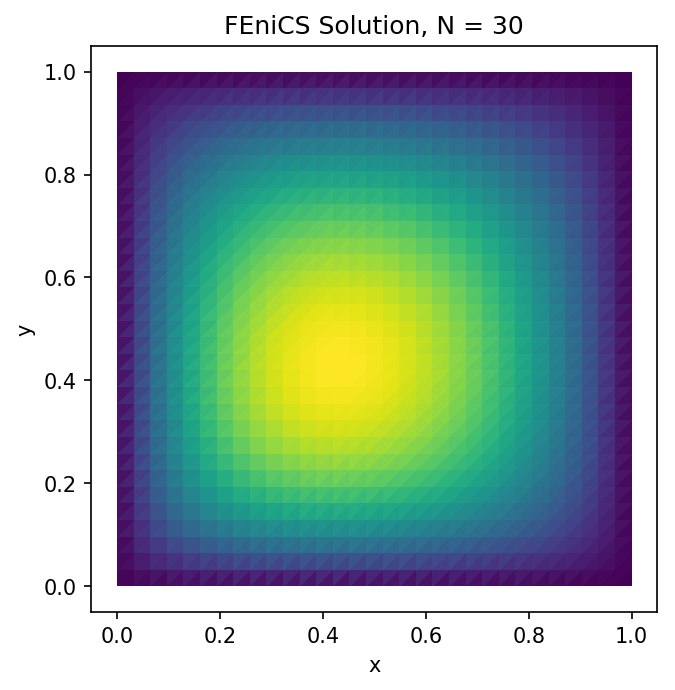

In [21]:
from fenics import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 30
mesh = UnitSquareMesh(N+1, N+1)
V = FunctionSpace(mesh, 'P', 1)

u_D = Constant(0.0) # boundary condition

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

u = TrialFunction(V)
v = TestFunction(V)
f = Constant(1)

sigma = Expression('1+x[0]*x[0] + x[1]*x[1]', degree=2)
a = dot(sigma*grad(u), grad(v))*dx

L = f*v*dx

u = Function(V)

solve(a == L, u, bc)
u.rename('u', 'solution')

plt.figure(dpi=150, figsize=(5,5))
plot(u)
plt.title("FEniCS Solution, N = {}".format(N))
plt.xlabel("x")
plt.ylabel('y')

#plt.savefig("fenics.png")

vtkfile = File('poisson.pvd')
vtkfile << u

## use relavite norm of residuals by normalizing by b
